# BPlot Tutorial

This notebook demonstrates the basic usage of B-RISK Plot (bplot) package.

The simplest way to plot data from B-RISK is to zip the b-risk results folder (right click "Send to Zip" in Windows Explorer). Remember to click save to save the results to disk first though! This process works best if the auto-save excel results box is checked.
Copy this zip file to the file storage system for your project, then create a python notebook to create and save plots.
(BPlot can also load data from B-RISK results folders)

Bplot reads
- Sprinkler and smoke detector times from the '_log.rtf' file,
- Room names and sizes from the 'input1.xml' file, and
- Results data from the '_results.xlsx' file

Usage of BPlot is fairly simple: import the package, load the results and then create plots.
The common plots are HRR, layer height, FED_CO, FED_thermal and visibility.

BPlot (B-RISK Plot) version: 0.8.0 (Run on 11-08-2024)
READ Log
Found: Sprinkler 1 activated at 110 s
READ input.xml (2 rooms)
READ Results: From 0 to 600 seconds


(<Figure size 585.938x366.211 with 1 Axes>,
 <Axes: xlabel='Time (s)', ylabel='Layer Height (m)'>)

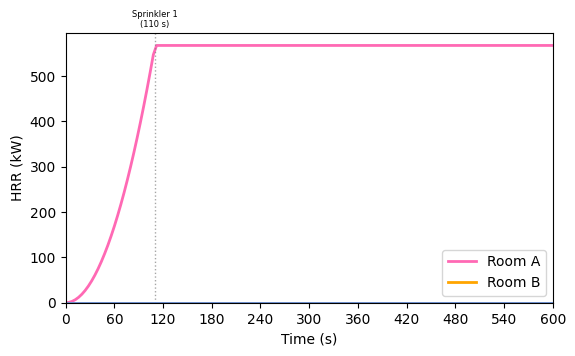

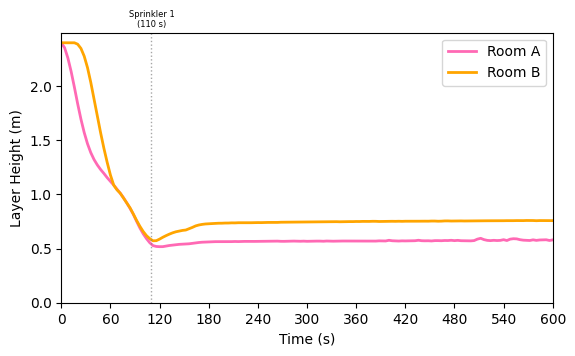

In [1]:
import bplot as bp

# Read the results
results = bp.b_risk_results('basemodel_example1.zip')

# Make plots
results.plot_hrr()
results.plot_layer_height()

Most functions take a `rooms` argument which plots the results for only the room names(s) in the provided list.

(<Figure size 585.938x366.211 with 1 Axes>,
 <Axes: xlabel='Time (s)', ylabel='Layer Height (m)'>)

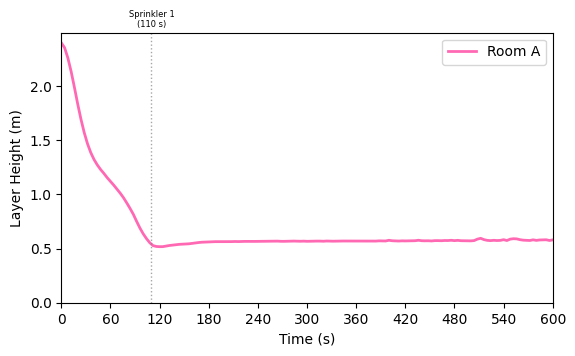

In [2]:
results.plot_layer_height(rooms=['Room A'])

Plots can easily be saved using the `savefig` function of the figure object:

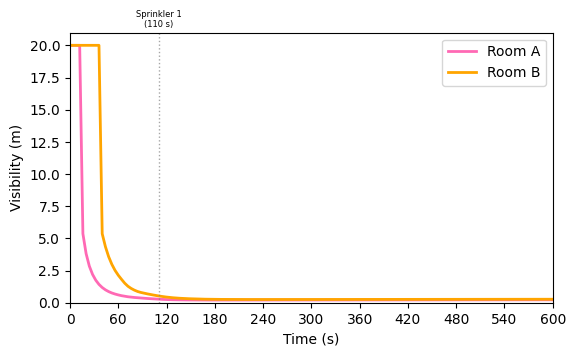

In [3]:
f, a = results.plot_visibility()
f.savefig('Example1_saved.png')

When showing the results of an ASET-RSET analysis, it is desirable to show key times on a FED graph. This can be done using the "times of interest" (`toi`) functionality. A list of tuples containing the times (in seconds) and the text string

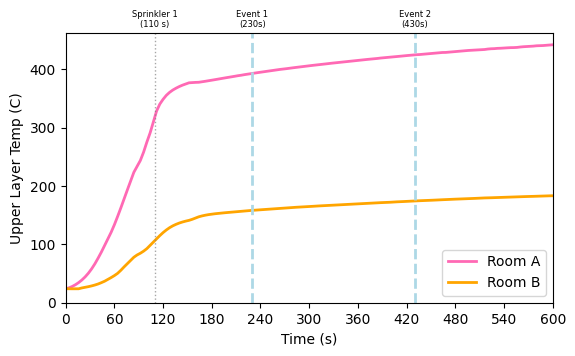

In [4]:
toi = [(230, 'Event 1\n(230s)'), (430, 'Event 2\n(430s)')]

f, a = results.plot_upper_layer_temp()
bp.add_user_line_texts(a, toi)

You will notice that all plot functions return two parameters, firstly the matplotlib figure and secondly the axes. This allows you to modify and customise the figure if you have any specific requirements. For example, moving the automatic legend location:

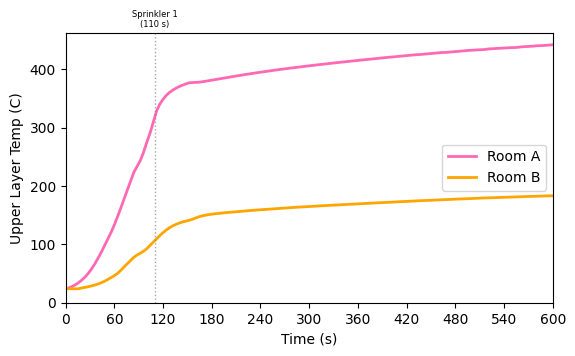

In [5]:
f, a = results.plot_upper_layer_temp()
a.legend(loc='center right')

### FED and Paths
One of the main advantages of bplot over B-RISK is that multiple FED paths can be plotted from a single analysis.
Egress paths are specified by a specifying a sequence of rooms and the times at which transition between them takes place.

- `plot_FED_CO_path` - to plot FED_CO (This is calculated using the NZ C/VM2 formula)
- `plot_room_FED_thermal` - to plot FED_thermal

To plot the FED in Room A from 0 to 300 s and then in Room B (note the last number is optional):
(Note also that the time at which FED threshold is exceeded is printed).

Note that bplot assumes an upper layer emissivity of 1. Therefore, will give slightly higher FED_thermal than B-RISK will calculate.

Room A (0-300s) - Room B (300-600s): FED_CO exceeds 0.30 at 248 s
Room A (0-300s) - Room B (300-450s): FED_CO exceeds 0.30 at 248 s


(<Figure size 585.938x366.211 with 1 Axes>,
 <Axes: xlabel='Time (s)', ylabel='FED_CO'>)

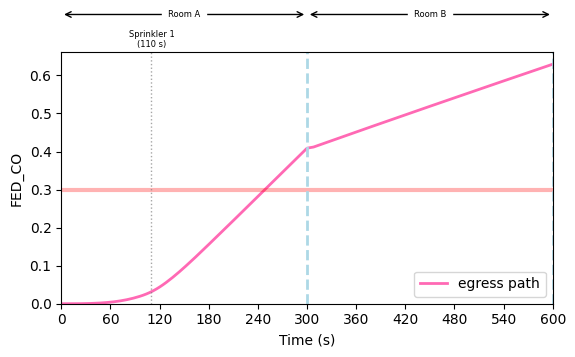

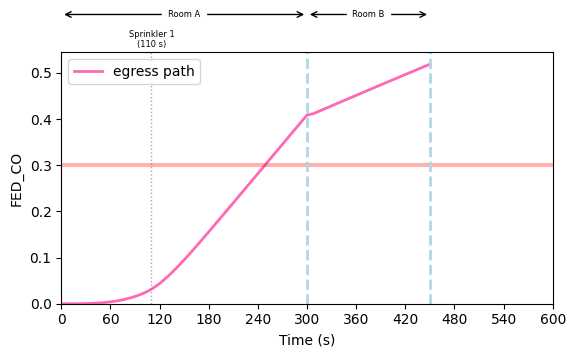

In [6]:
results.plot_FED_CO_path(['Room A', 'Room B'], [300])
results.plot_FED_CO_path(['Room A', 'Room B'], [300, 450])

You can also adjust the FED thershold and the height at which the FED is calculated (Note this is height above the floor), for example:

Room A (0-150s) - Room B (150-600s): FED_CO exceeds 0.20 at 306 s


(<Figure size 585.938x366.211 with 1 Axes>,
 <Axes: xlabel='Time (s)', ylabel='FED_CO'>)

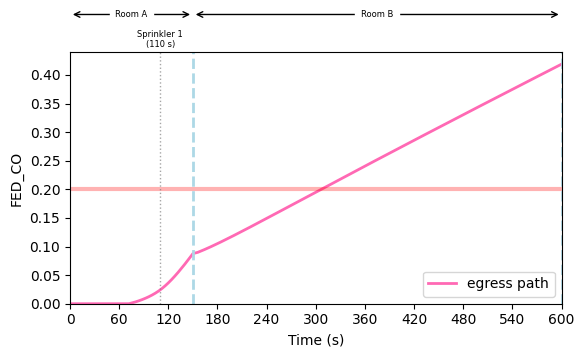

In [7]:
results.plot_FED_CO_path(['Room A', 'Room B'], [150], FED_threshold=0.2, monitoring_height=1)

A hand diagnostic plot to plot both FED for a rooms is:

FED_thermal exceeds 0.30 at 76 s
Room A (0-600s): FED_CO exceeds 0.30 at 248 s


(<Figure size 585.938x366.211 with 1 Axes>,
 <Axes: xlabel='Time (s)', ylabel='FED'>)

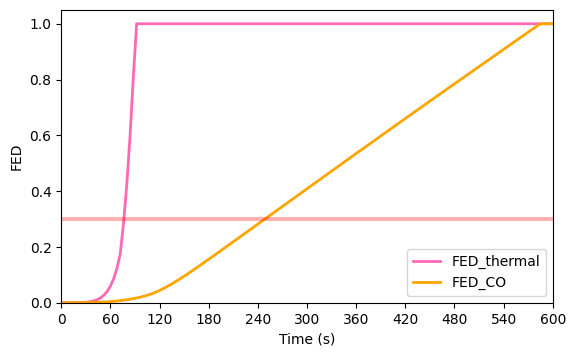

In [30]:
results.plot_room_FEDs('Room A')

## Customising Plots

### Changing Styles

The styles of the plot an be customised to a particular application.
There are three types of annotations (lines and text):
1. Event Style (bplot.event_style) - the style applied to events (sprinkler and smoke detector activations)
2. Tenability Style (bplot.event_style) - the style applied to tenability (horizontal) lines. No text is permitted for this style.
3. User Style (bplot.user_style) - the style applied to user specified events such as thorugh `bplot.add_user_line_texts`

A style consists of the following parameters:
- line - line properties passed directly to the matplotlib line function (vline or hline), e.g. linewidth, linestyle, color, alpha, etc
- text - text properties passed directly to the matplotlib text annotation functions e.ge fontsize, etc
- text_y - the y (vertical) ordinate of the text relative to the top of the axes (i.e. 1.0 is the top of the axes)
- arrow_y - the y (vertical) ordinate of the arrow relative to the top of the axes (i.e. 1.0 is the top of the axes)

Each of the three styles can be customised, for example the event style can be customised by:

(<Figure size 585.938x366.211 with 1 Axes>,
 <Axes: xlabel='Time (s)', ylabel='HRR (kW)'>)

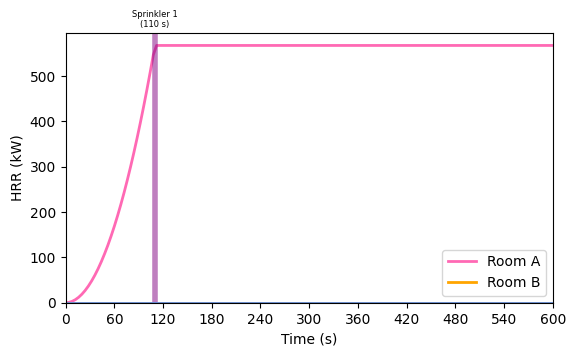

In [8]:
bp.event_style = bp.style({'linewidth':4, 'linestyle':'solid', 'color':'purple', 'alpha':0.5},
                     {'fontsize':6},
                     text_y = 1.02,
                     arrow_y=1.15)

results.plot_hrr()

## Different annotations
Since the figure and axes matplotlib object are returned, almost any further customisation is possible.
However, there are a few built-in annotations to help:

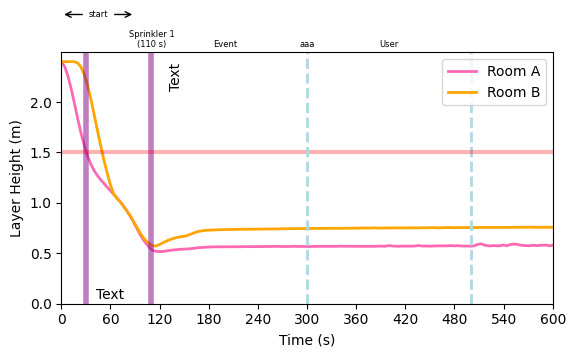

In [29]:
f, a = results.plot_layer_height()

# Plotting vertical lines using the event and user styles respectively:
# add_event_vline(ax, time, **kwargs)
# add_user_vline(ax, time, **kwargs) - the 'verticalalignment' keyword argument will be helpful in poisitioning the text
# any arguments are passed directly to the matplotlib `vline` function
bp.add_event_vline(a, 30)
bp.add_user_vline(a, 500)

# Plotting horizontal lines using the tenability style:
# add_tenability_hline
# any arguments are passed directly to the matplotlib `hline` function
bp.add_tenability_hline(a, 1.5)

# Adding text annotations
# add_Htext(ax, time, text, text_y=1.03, **kwargs) - for horizontal text
# add_Vtext(ax, time, text, text_y, **kwargs) - for vertical text
# Any keyword arguments are passed to the `axes.text` command that the annotation is added with.
# Note text_y is relative to the axes i.e. 1 is the top of the axes.
# add_event_text(ax, time, text, text_y=None, **kwargs) - add text using the event style, text_y will override the default style value
# add_user_text(ax, time, text, text_y=None, **kwargs) - add text using the user style, text_y will override the default style value
bp.add_Htext(a, 60, 'Text', text_y=0.02)
bp.add_Vtext(a, 140, 'Text', text_y=0.9)
bp.add_event_text(a, 200, 'Event')
bp.add_user_text(a, 400, 'User')

# Adding lines and text at the same time
# add_user_vline_text(ax, time, text, **kwargs)
# Plots a line at the given time and the text above the line. The user style is used for both.
# add_user_line_texts(ax, lines_texts)
# Plots a line at the given time and the text above the line for each tuple pair (time, text in lines_texts). The user style is used for both.
bp.add_user_vline_text(a, 300, 'aaa')

# Adding text and horizontal line with arrows
# add_span_text(ax, x1, x2, text, **kwargs)
# Add a line between x1 and x2 (with arrow at each end) and place text above the centre of the line.
bp.add_span_text(a, 0, 90, 'start')
# If you want to change the formatting of all plots, overwrite the 'format_plot' function.
